In [1]:
# !pip install anndata
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/sad2/projekt/SAD2022Z"
train = path + "/SAD2022Z_Project1_GEX_train.h5ad"
test = path + "/SAD2022Z_Project1_GEX_test.h5ad"

In [4]:
import scanpy as sc

In [5]:
train_adata = sc.read_h5ad(train)
test_adata = sc.read_h5ad(test)

# **1.a**

## Dane trenujące mają 72208 obserwacji oraz 5000 zmiennych.

## Dane testujące mają 18052 obserwacji oraz 5000 zmiennych.

In [6]:
print("Train")
print(train_adata)
print("Test")
print(test_adata)

Train
AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'
Test
AnnData object with n_obs × n_vars = 18052 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorB

# **1.b**

In [10]:
import matplotlib.pyplot as plt

def joined_hist_plot(a, b, name):
    fig, ax = plt.subplots(2, figsize=(6, 6))

    fig.tight_layout(pad=2.5)

    ax[0].hist(a)
    ax[0].set_title("preprocessed")
    ax[1].hist(b)
    ax[1].set_title("raw")

    ax[1].set_xlabel('value')
    plt.savefig(name)
    plt.show()   

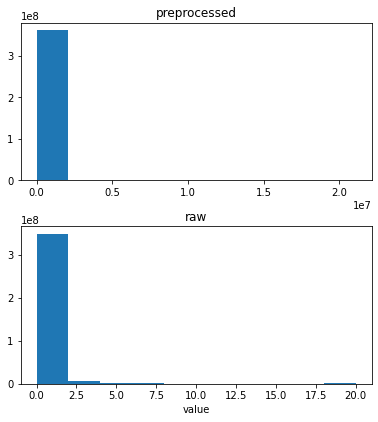

In [11]:
flat_train = train_adata.X.toarray().reshape(-1, 1)
falt_train_raw = train_adata.layers["counts"].toarray().reshape(-1, 1).clip(0,20)

joined_hist_plot(flat_train, falt_train_raw, "1_b.png")

# 1.**d**

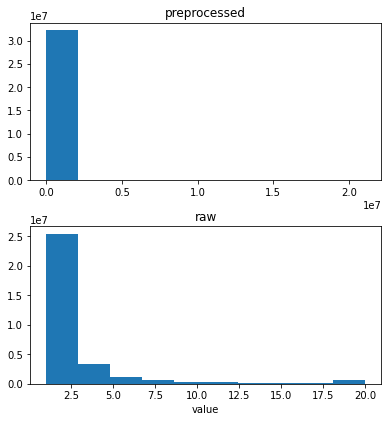

In [12]:
nonzero_flat_train = flat_train[flat_train != 0]
nonzero_falt_train_raw = falt_train_raw[falt_train_raw != 0]

joined_hist_plot(nonzero_flat_train, nonzero_falt_train_raw, "1_d.png")

# 1.**f**

In [16]:
import pandas as pd

In [37]:
df = train_adata.obs
df.columns

Index(['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
       'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
       'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
       'is_train'],
      dtype='object')

In [38]:
patient_amount = len(df)
lab_amount = len(df.groupby("Site").size())
cell_type_amount = len(df.groupby("cell_type").size())

print(f"patient_amount: {patient_amount}")
print(f"lab_amount: {lab_amount}")
print(f"ncell_type_amount: {cell_type_amount}")

patient_amount: 72208
lab_amount: 4
ncell_type_amount: 45


# **TODO: 1.c, 1.e, 1.f opisanie**